In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, NMF
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.neighbors import NearestNeighbors
import zipfile
import requests
# Download data from Github (we will use the loan-datasets for now)

    # Defination of url-paths
url1 = 'https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip'
url2 = 'https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip'
url3 = 'https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip'

    # Loading the urls into requests to download data

response1 = requests.get(url1)

response2 = requests.get(url2)

response3 = requests.get(url3)

    # Saves the .zip data as files

with open("kiva_loans_part_0.csv.zip", "wb") as file:
    file.write(response1.content)

with open("kiva_loans_part_1.csv.zip", "wb") as file:
    file.write(response2.content)

with open("kiva_loans_part_2.csv.zip", "wb") as file:
    file.write(response3.content)

    # Unzip the files to get .csv

with zipfile.ZipFile("kiva_loans_part_0.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile("kiva_loans_part_1.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile("kiva_loans_part_2.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

    # Loading partial datasets

data_part1 = pd.read_csv("kiva_loans_part_0.csv")

data_part2 = pd.read_csv("kiva_loans_part_1.csv")

data_part3 = pd.read_csv("kiva_loans_part_2.csv")

    # Combining the datasets into one df using pd.concat



# We can see, that the imported loan dataset consists of 3 parts. We will like to combine these to one big dataset
data = pd.concat([data_part1, data_part2, data_part3])

In [2]:
data = data.drop(['tags', 'use', 'currency', 'country_code', 'activity', 'id', 'partner_id', 'region','date'], axis=1)
data = data.drop(['disbursed_time','repayment_interval','term_in_months'], axis=1)
#sector
#le_sector=LabelEncoder()
#data['sector'] = le_sector.fit_transform(data.sector)

#sector
#le_country=LabelEncoder()
#data['country'] = le_country.fit_transform(data.country)
data_gender=data[['borrower_genders']]
data=data.drop(['country','sector','borrower_genders'],  axis=1)


In [3]:
# Define list of date columns
list_time = ["posted_time", 'funded_time']

# Convert date columns to datetime and then to numeric
for i in list_time:
    # Convert to datetime format
    data[i] = pd.to_datetime(data[i])
    # Convert datetime to numeric (seconds since the earliest date)
    data[i] = (data[i] - data[i].min()).dt.total_seconds()

data["total_funded_time"]=data['funded_time']-data['posted_time']
data.drop(['posted_time','funded_time'],axis=1,inplace=True)


# Handle missing values
data.dropna(inplace=True)

In [4]:
data

,funded_amount,loan_amount,lender_count,total_funded_time
0,300.0,300.0,12,73464.0
1,575.0,575.0,14,68206.0
2,150.0,150.0,6,-5160.0
3,200.0,200.0,8,-9160.0
4,400.0,400.0,16,-237.0
...,...,...,...,...
221166,25.0,25.0,1,81938.0
221170,25.0,25.0,1,28310.0
221177,25.0,25.0,1,169840.0
221186,25.0,25.0,1,31222.0


In [5]:
data = data[data['total_funded_time'] >= 0]

In [6]:
#data

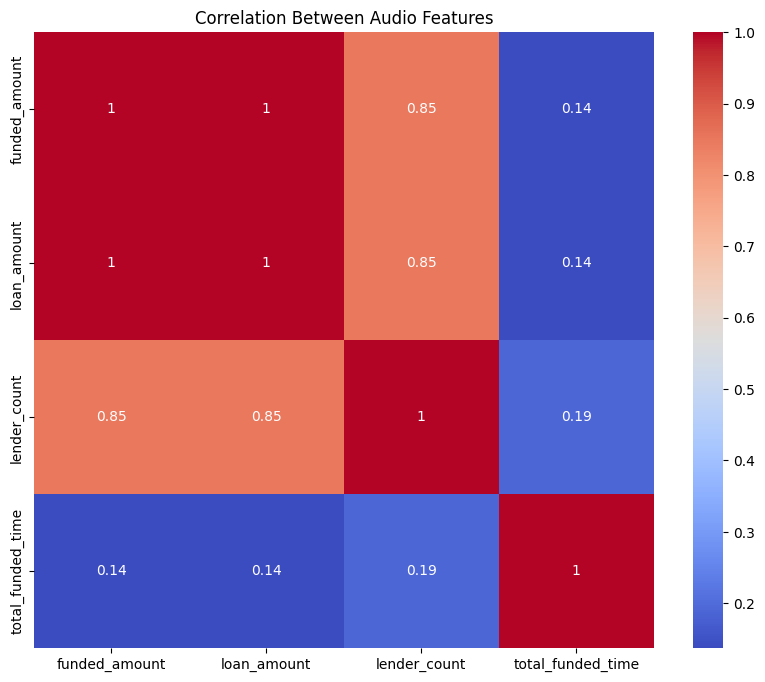

In [7]:
correlation = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()

In [8]:
data = data.drop(['loan_amount'], axis=1)

In [9]:
# Scale data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [10]:

# Initializing an empty list to store the sum of squared distances for each 'k'
Sum_of_squared_distances = []

# Define a range for possible cluster values (1 to 9)
K = range(1, 10)

# For each possible 'k', fit a KMeans model and compute the sum of squared distances
for k in K:
    km = KMeans(n_clusters=k, n_init = "auto")               # Initialize the KMeans model with 'k' clusters
    km.fit(data_scaled)          # Fit the model on the scaled data
    Sum_of_squared_distances.append(km.inertia_)  # Append the model's inertia (sum of squared distances) to the list

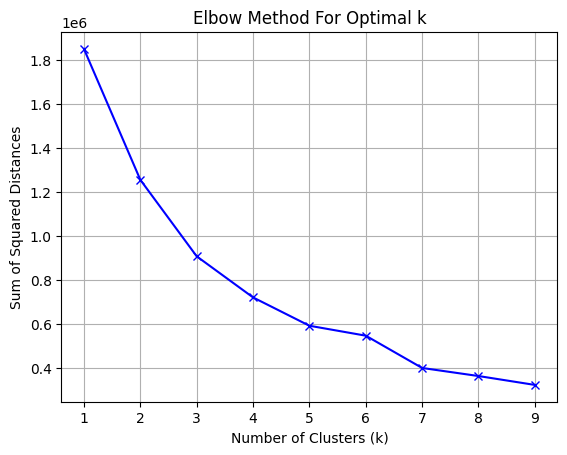

In [11]:
# Plot the sum of squared distances for each 'k' to determine the 'elbow'
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)  # Add a grid for better visualization
plt.show()

In [12]:
k =3

In [13]:
print(data_scaled)

        funded_amount  lender_count  total_funded_time
0           -0.435330     -0.314251          -0.946079
1           -0.196919     -0.245716          -0.950305
2           -0.478678     -0.519855           0.929974
3           -0.348635     -0.451320          -0.382761
4           -0.153572      0.096959          -0.858768
...               ...           ...                ...
616831      -0.673741     -0.691192          -0.939266
616832      -0.673741     -0.691192          -0.982378
616833      -0.673741     -0.691192          -0.868602
616834      -0.673741     -0.691192          -0.980037
616835      -0.673741     -0.691192          -0.969149

[616836 rows x 3 columns]


### That is not good

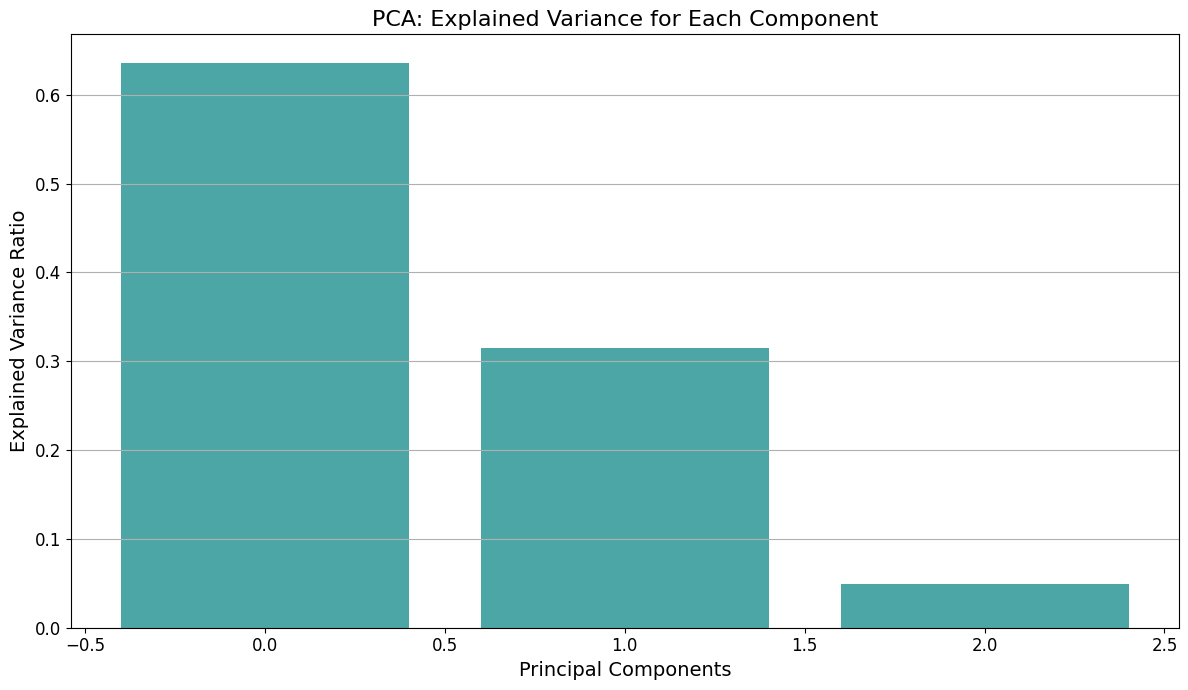

In [14]:
# Conducting PCA
pca = PCA()
X_pca = pca.fit_transform(data_scaled)
# Visualizing explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', color='teal')
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.title('PCA: Explained Variance for Each Component', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

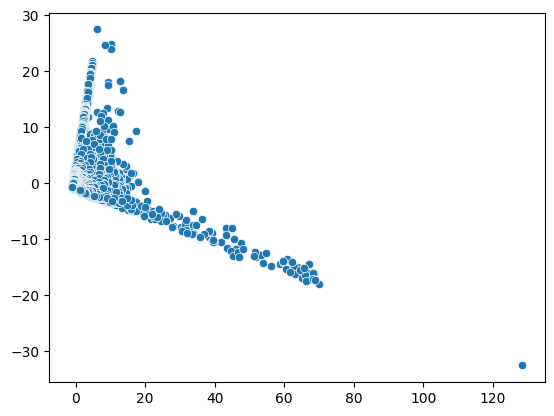

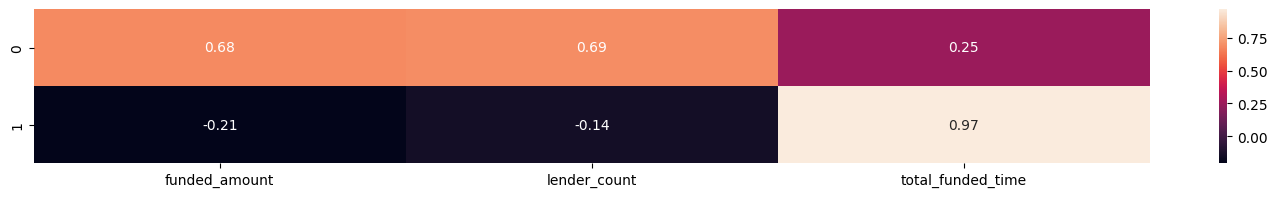

In [15]:
pca = PCA(n_components=2)
data_reduced_pca = pca.fit_transform(data_scaled)

sns.scatterplot(x=data_reduced_pca[:,0], y=data_reduced_pca[:,1])

plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data.columns), annot=True)
plt.show()

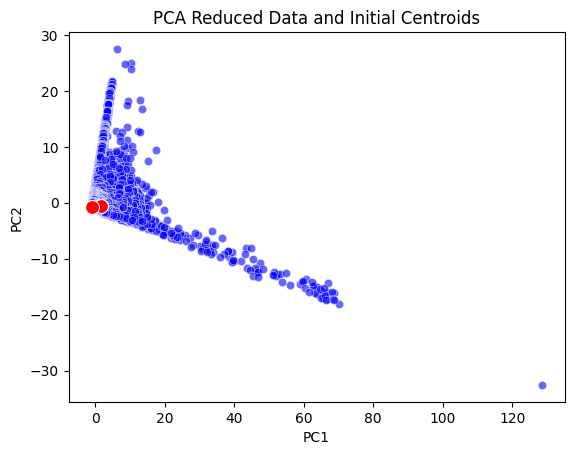

In [16]:
max_iters=100

# 1. Initialize the k cluster centroids
centroids = data_reduced_pca[np.random.choice(data.shape[0], k, replace=False)]
# Plot observations
sns.scatterplot(x=data_reduced_pca[:, 0], y=data_reduced_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and Initial Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [17]:
# 2. Assign each data point to the closest centroid
distances_iter1 = cosine_distances(data_reduced_pca, centroids)
labels = np.argmin(distances_iter1, axis=1)


In [18]:
# Reducing dimensions for visualization purposes (2 components)
X_pca_2d = pca.fit_transform(data_scaled)

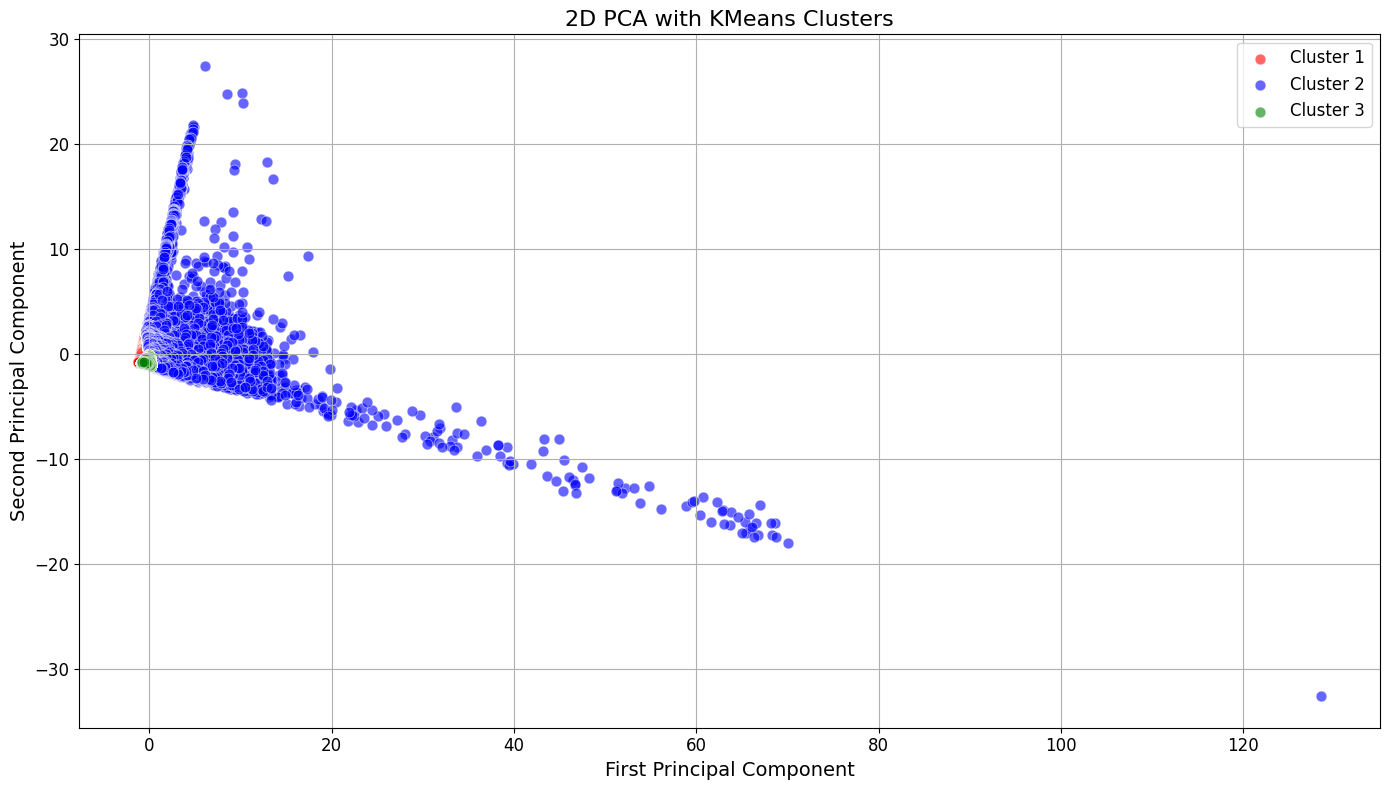

In [19]:
# Visualizing clusters
colors = ['red', 'blue', 'green','purple','orange']
plt.figure(figsize=(14,8))
for i, color, label in zip(range(k), colors, ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5']):
    plt.scatter(X_pca_2d[labels == i, 0], X_pca_2d[labels == i, 1], s=60, c=color, label=label, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.legend(fontsize=12)
plt.title('2D PCA with KMeans Clusters', fontsize=16)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print(data)

        funded_amount  lender_count  total_funded_time
0               300.0            12            73464.0
1               575.0            14            68206.0
5               250.0             6          2407149.0
7               400.0             8           774194.0
9               625.0            24           182072.0
...               ...           ...                ...
221166           25.0             1            81938.0
221170           25.0             1            28310.0
221177           25.0             1           169840.0
221186           25.0             1            31222.0
221201           25.0             1            44766.0

[616836 rows x 3 columns]


### New Section

In [21]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=k)

# Fit the K-Means model on the scaled windows
kmeans.fit(data_scaled)

# Retrieve the cluster labels for each window
labels = kmeans.labels_

In [22]:

# Add cluster labels to the windows DataFrame
size=6

data_scaled['Cluster'] = labels # This is an array containing the cluster number for each window, which we from the K-Means algorithm.

# Display the first few rows with cluster assignments

print(data_scaled.head())

   funded_amount  lender_count  total_funded_time  Cluster
0      -0.435330     -0.314251          -0.946079        0
1      -0.196919     -0.245716          -0.950305        0
2      -0.478678     -0.519855           0.929974        2
3      -0.348635     -0.451320          -0.382761        0
4      -0.153572      0.096959          -0.858768        0


In [27]:

# Convert 'total_funded_time' from seconds to days
data['total_funded_time'] = data['total_funded_time'] / 3600


   funded_amount  lender_count  total_funded_time  Cluster
0          300.0            12          20.406667        0
1          575.0            14          18.946111        0
5          250.0             6         668.652500        2
7          400.0             8         215.053889        0
9          625.0            24          50.575556        0


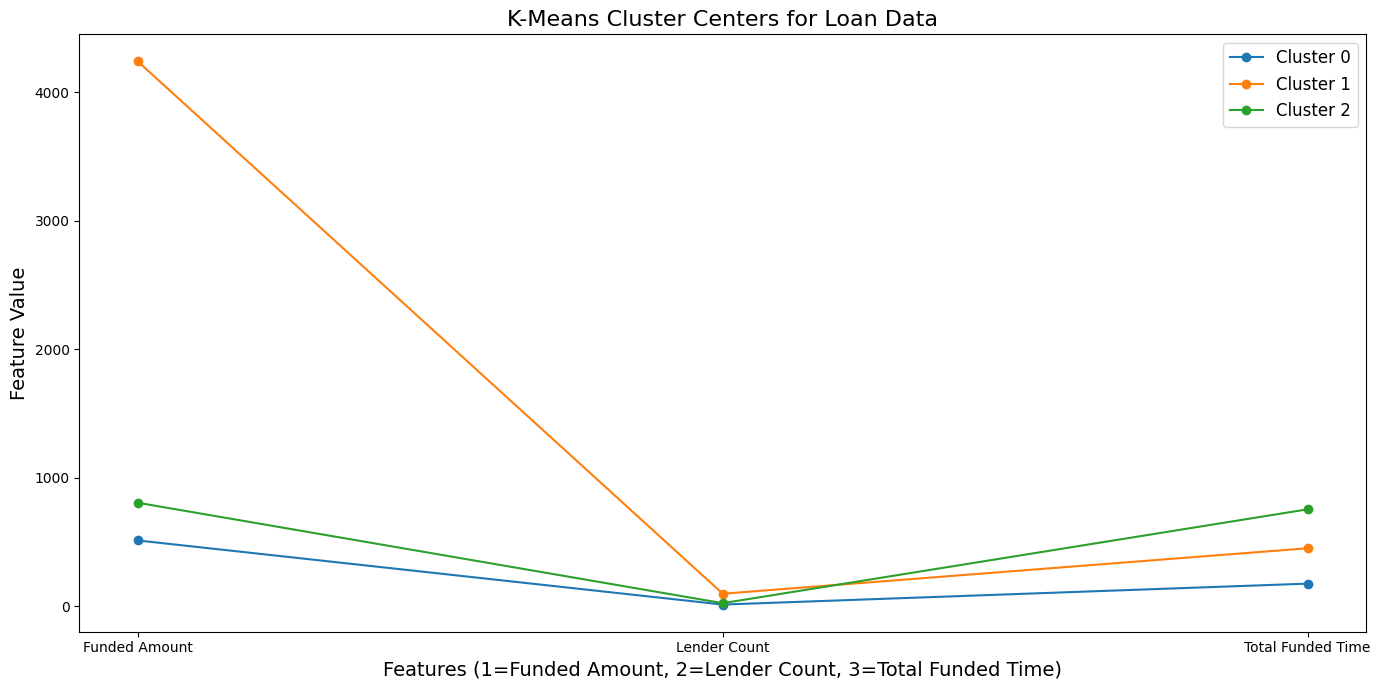

In [28]:
# Select the columns for clustering
features = ['funded_amount', 'lender_count', 'total_funded_time']


# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Initialize K-Means with k clusters
k = 3  # You can change k based on how many clusters you want
kmeans = KMeans(n_clusters=k)

# Fit the K-Means model on the scaled data
kmeans.fit(data_scaled)

# Retrieve the cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
data['Cluster'] = labels

# Display the first few rows with cluster assignments
print(data.head())

# Retrieve the cluster centers and inverse transform them to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot each cluster center (with 3 features: funded_amount, lender_count, total_funded_time)
plt.figure(figsize=(14,7))
for i in range(k):
    plt.plot(range(1, 4), cluster_centers[i], marker='o', label=f'Cluster {i}')

# Titles and labels
plt.title('K-Means Cluster Centers for Loan Data', fontsize=16)
plt.xlabel('Features (1=Funded Amount, 2=Lender Count, 3=Total Funded Time)', fontsize=14)
plt.ylabel('Feature Value', fontsize=14)
plt.legend(fontsize=12)

# Adjust X-ticks to match feature columns
plt.xticks(range(1, 4), ['Funded Amount', 'Lender Count', 'Total Funded Time'])
plt.tight_layout()
plt.show()

### That is the recomendation

In [25]:

data_param = data[['funded_amount']]  # Using 'funded_amount' column

# Initialize the scaler and scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_param)

# Initialize the Nearest Neighbors model with cosine similarity
knn = NearestNeighbors(n_neighbors=10, metric='cosine')

# Fit the model with scaled data
knn.fit(scaled_data)

# Function to get recommendations based on a given funded amount
def get_recommendations_knn(total_loan, knn_model=knn):
    # Check if the loan amount exists
    if total_loan not in data['funded_amount'].values:
        return f"Loan amount {total_loan} not found in data."

    # Find the index of the total loan amount
    idx = data.index[data['funded_amount'] == total_loan].tolist()[0]

    # Reshape the data point for query
    query_data = scaled_data[idx].reshape(1, -1)

    # Get the nearest neighbors (distances and indices)
    distances, indices = knn_model.kneighbors(query_data, n_neighbors=10)

    # Return the total_funded_time for the nearest neighbors
    return data['total_funded_time'].iloc[indices[0]]




In [26]:
recommendations = get_recommendations_knn(1000)
if isinstance(recommendations, str):
  print(recommendations)
else:
  print(recommendations // 86400)

209475     5.0
209473     6.0
209480     5.0
209479    33.0
209478    31.0
70381     13.0
209483    10.0
70384     26.0
209471    33.0
209485     6.0
Name: total_funded_time, dtype: float64
